In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df=pd.read_csv('/content/economic_index.csv')

In [6]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [7]:
df.shape

(24, 6)

In [8]:
df.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [9]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [10]:
df.isnull().sum()

,0
interest_rate,0
unemployment_rate,0
index_price,0


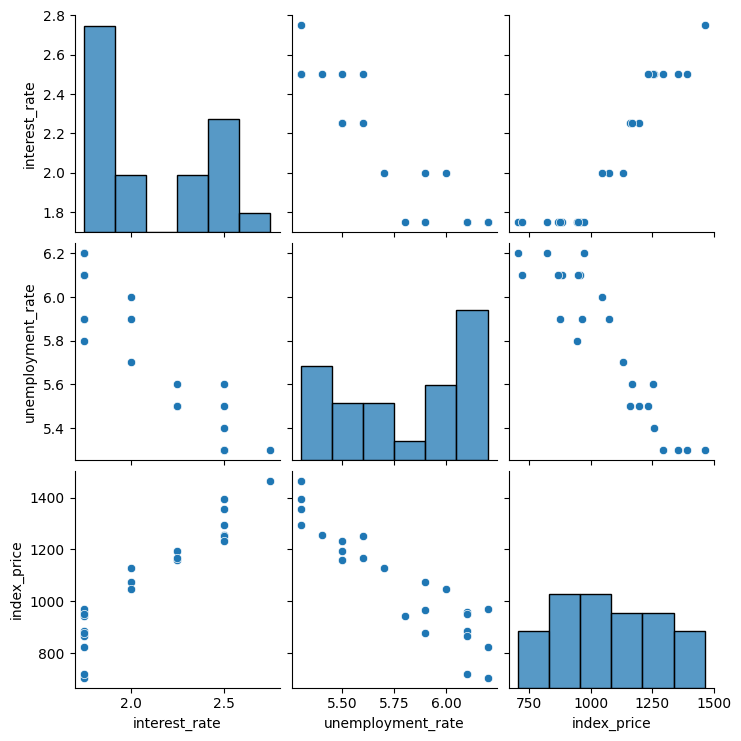

In [11]:
sns.pairplot(df)

In [12]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


In [13]:
#Independent and Dependent Features
X=df.iloc[:,:-1]
y=df.iloc[:,-1]


In [14]:
X.head()

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [15]:
y.head()


,index_price
0,1464
1,1394
2,1357
3,1293
4,1256


In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

<Axes: xlabel='index_price', ylabel='interest_rate'>

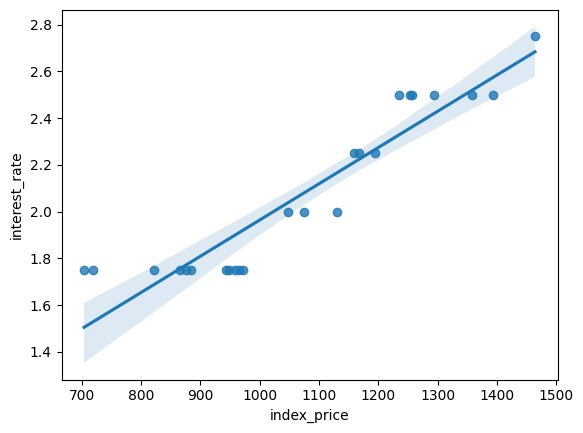

In [17]:
sns.regplot(x='index_price',y='interest_rate',data=df)

<Axes: xlabel='unemployment_rate', ylabel='interest_rate'>

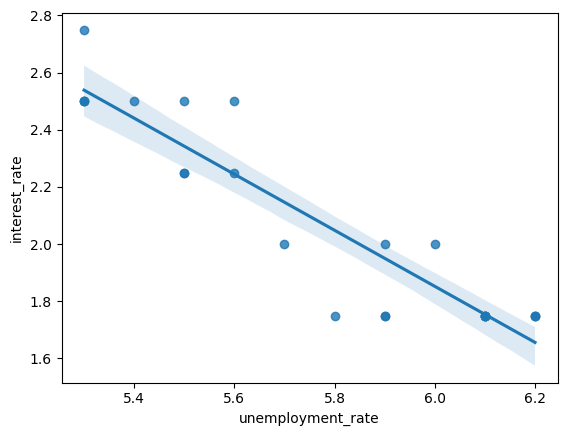

In [18]:
sns.regplot(x='unemployment_rate',y='interest_rate',data=df)

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

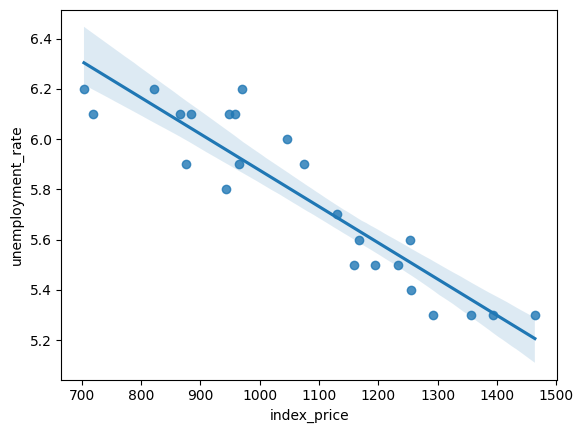

In [19]:
sns.regplot(x='index_price',y='unemployment_rate',data=df)

In [20]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()

In [21]:
X_train=scaler.fit_transform( X_train)

In [22]:
X_test=scaler.transform(X_test)

In [23]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression(n_jobs=-1)

In [24]:
regression.fit(X_train,y_train)

LinearRegression(n_jobs=-1)

In [27]:
##Cross validation
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
np.mean(validation_score)

-5914.828180162386

In [28]:
##Prediction
y_pred=regression.predict(X_test)

In [30]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [32]:
mse = mean_squared_error(y_test,y_pred)

In [33]:
rmse=mse**0.5

In [34]:
mae=mean_absolute_error(y_test,y_pred)

In [36]:
print("Mean Squared Error:",mse)
print("Mean Absolute Error:",mae)
print("Root Mean Squared Error:",rmse)

Mean Squared Error: 5793.762887712569
Mean Absolute Error: 59.935781523235484
Root Mean Squared Error: 76.11677139574805


In [38]:
from sklearn.metrics import r2_score

In [41]:
score=r2_score(y_test,y_pred)
print(score)

0.8278978091457145


In [43]:
#display adjusted R-squared
1 - (1-score)*(len(y_train)-1)/(len(y_train)-X_train.shape[1]-1)

0.8049508503651431

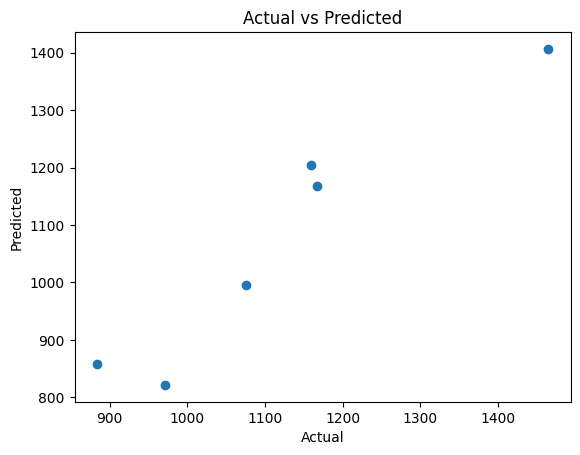

In [45]:
##Assumptions
plt.scatter(y_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted')
plt.show()

In [46]:
residuals=y_test-y_pred
print(residuals)

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64


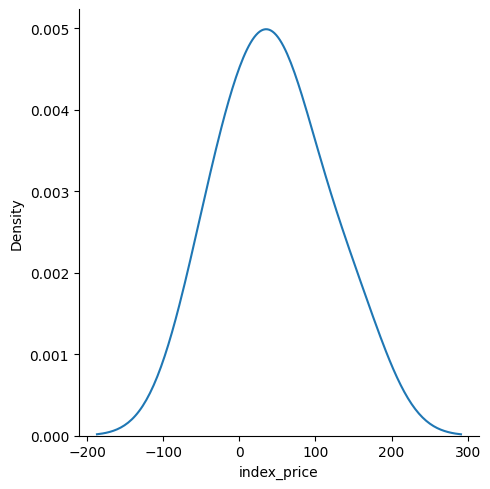

In [47]:
#plot this residuals
sns.displot(residuals,kind='kde')

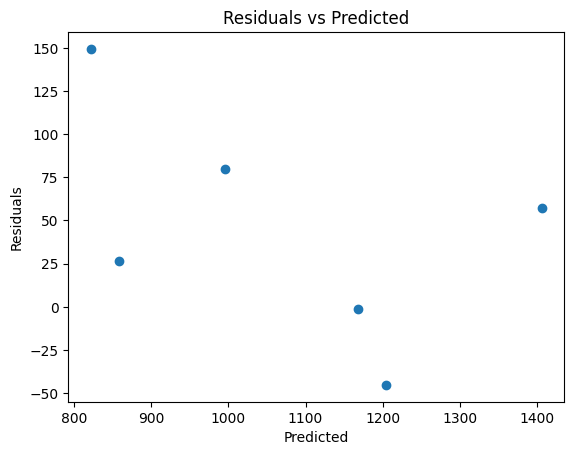

In [48]:
##create a scatter plot with respect to predictions and residuals
plt.scatter(y_pred,residuals)
plt.xlabel('Predicted')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted')
plt.show()

In [49]:
import statsmodels.api as sm
sm.OLS(y_train,X_train).fit().summary()


/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Thu, 22 Aug 2024   Prob (F-statistic):                       0.754
Time:                        19:24:21   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
regression.coef_

array([  88.27275507, -116.25716066])

In [51]:
regression.intercept_

1053.4444444444443